In [1]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
from sklearn.decomposition import PCA

from ae import AE

Loading model.

In [2]:
ae2 =  AE(device='cpu', latent_dim=2)
ae3 =  AE(device='cpu', latent_dim=3)
ae5 =  AE(device='cpu', latent_dim=5)
ae10 =  AE(device='cpu', latent_dim=10)

In [3]:
model2 = torch.load('best_models/autoencoder_ld2_all.pth', map_location=torch.device('cpu'), weights_only=True)
model3 = torch.load('best_models/autoencoder_ld3_all.pth', map_location=torch.device('cpu'), weights_only=True)
model5 = torch.load('best_models/autoencoder_ld5_all.pth', map_location=torch.device('cpu'), weights_only=True)
model10 = torch.load('best_models/autoencoder_ld10_all.pth', map_location=torch.device('cpu'), weights_only=True)

ae2.load_state_dict(model2)
ae3.load_state_dict(model3)
ae5.load_state_dict(model5)
ae10.load_state_dict(model10)

<All keys matched successfully>

## Learning Curves

Plotting learning curves.

In [4]:
loss2 = np.load('best_models/loss_autoencoder_ld2_all.npy')
loss3 = np.load('best_models/loss_autoencoder_ld3_all.npy')
loss5 = np.load('best_models/loss_autoencoder_ld5_all.npy')
loss10 = np.load('best_models/loss_autoencoder_ld10_all.npy')

epochs2 = [i for i in range(loss2.shape[0])]
epochs3 = [i for i in range(loss3.shape[0])]
epochs5 = [i for i in range(loss5.shape[0])]
epochs10 = [i for i in range(loss10.shape[0])]

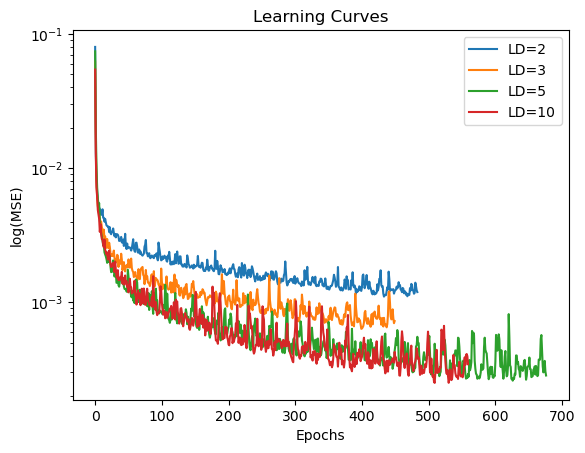

In [5]:
plt.plot(epochs2, loss2, label='LD=2')
plt.plot(epochs3, loss3, label='LD=3')
plt.plot(epochs5, loss5, label='LD=5')
plt.plot(epochs10, loss10, label='LD=10')

plt.yscale('log')
plt.ylabel('log(MSE)')
plt.xlabel('Epochs')
plt.title('Learning Curves')
plt.legend()
plt.show()

## Model avaliation

Loading data.

In [6]:
data1 = np.load('dataset_TipAu_Au.npz')['vDeflection_N']
data2 = np.load('dataset_TipAu_SiO2.npz')['vDeflection_N']
data3 = np.load('dataset_TipLig_CL.npz')['vDeflection_N']
data4 = np.load('dataset_TipLig_SiO2.npz')['vDeflection_N']

data1 = torch.tensor(data1, dtype=torch.float32).unsqueeze(1)
data2 = torch.tensor(data2, dtype=torch.float32).unsqueeze(1)
data3 = torch.tensor(data3, dtype=torch.float32).unsqueeze(1)
data4 = torch.tensor(data4, dtype=torch.float32).unsqueeze(1)

data_auau = data1 / data1.max()
data_ausio2 = data2 / data2.max()
data_ligcl = data3 / data3.max()
data_ligsio2 = data4 / data4.max()

Testing.

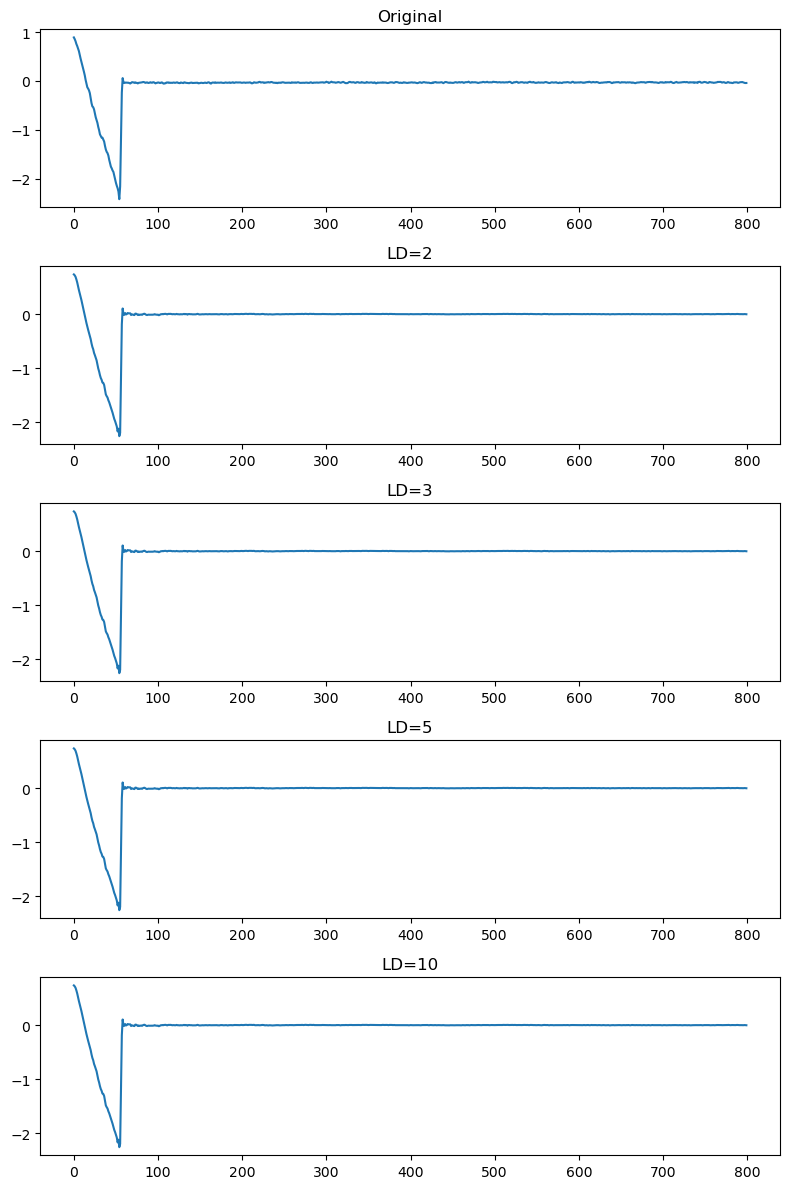

In [7]:
curve0 = data_ausio2[0]

with torch.no_grad():
    curve0_pred2 = ae2(curve0.unsqueeze(0))
    curve0_pred3 = ae3(curve0.unsqueeze(0))
    curve0_pred5 = ae5(curve0.unsqueeze(0))
    curve0_pred10 = ae10(curve0.unsqueeze(0))

fig, ax = plt.subplots(5, 1, figsize=(8, 12))

im0 = ax[0].plot(curve0.squeeze())
ax[0].set_title('Original')

im1 = ax[1].plot(curve0_pred2.squeeze())
ax[1].set_title('LD=2')

im1 = ax[2].plot(curve0_pred2.squeeze())
ax[2].set_title('LD=3')

im1 = ax[3].plot(curve0_pred2.squeeze())
ax[3].set_title('LD=5')

im1 = ax[4].plot(curve0_pred2.squeeze())
ax[4].set_title('LD=10')

plt.tight_layout()
plt.show()

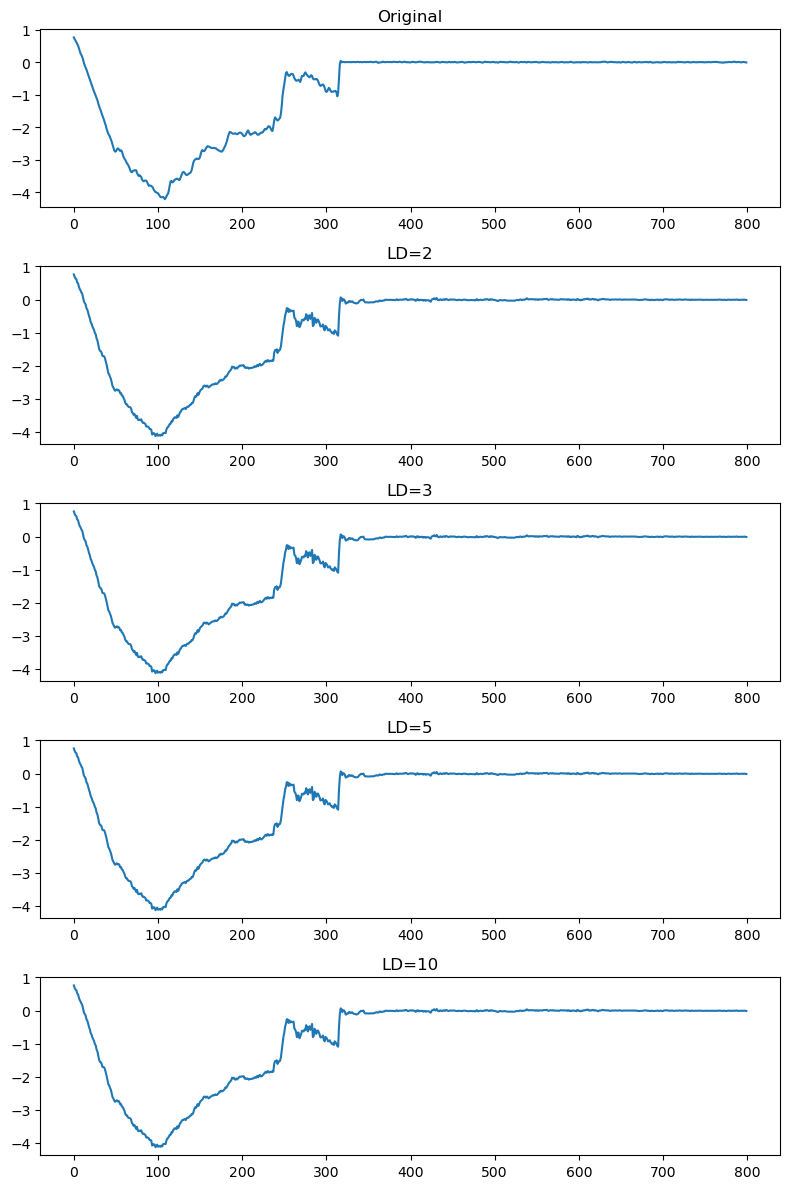

In [8]:
curve15 = data_ausio2[15]

with torch.no_grad():
    curve15_pred2 = ae2(curve15.unsqueeze(0))
    curve15_pred3 = ae3(curve15.unsqueeze(0))
    curve15_pred5 = ae5(curve15.unsqueeze(0))
    curve15_pred10 = ae10(curve15.unsqueeze(0))

fig, ax = plt.subplots(5, 1, figsize=(8, 12))

im0 = ax[0].plot(curve15.squeeze())
ax[0].set_title('Original')

im1 = ax[1].plot(curve15_pred2.squeeze())
ax[1].set_title('LD=2')

im1 = ax[2].plot(curve15_pred2.squeeze())
ax[2].set_title('LD=3')

im1 = ax[3].plot(curve15_pred2.squeeze())
ax[3].set_title('LD=5')

im1 = ax[4].plot(curve15_pred2.squeeze())
ax[4].set_title('LD=10')

plt.tight_layout()
plt.show()

## Latent Space

Plotting for LD=2.

In [9]:
ld2_auau = np.load('best_models/ld2_auau_all.npy')
ld2_ausio2 = np.load('best_models/ld2_ausio2_all.npy')
ld2_ligcl = np.load('best_models/ld2_ligcl_all.npy')
ld2_ligsio2 = np.load('best_models/ld2_ligsio2_all.npy')

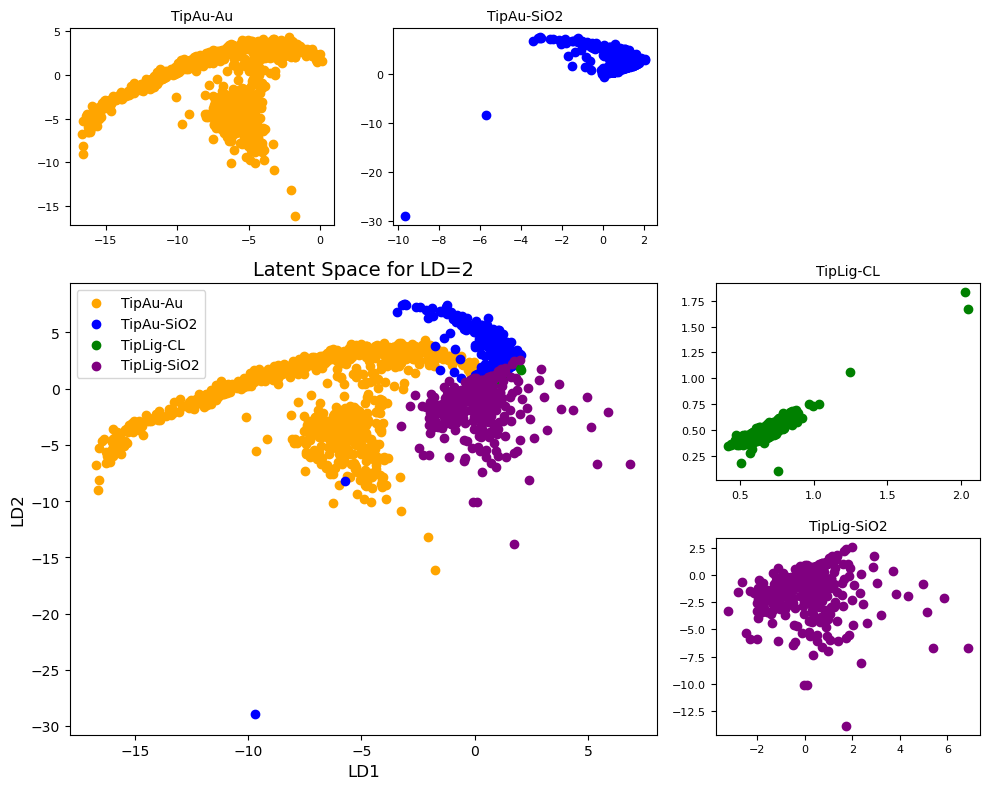

In [10]:
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 3)  
ax_main = plt.subplot(gs[1:3, 0:2])  

ax1 = plt.subplot(gs[0, 0])  
ax2 = plt.subplot(gs[0, 1])  
ax3 = plt.subplot(gs[1, 2])  
ax4 = plt.subplot(gs[2, 2])  

ax1.scatter(ld2_auau[:, 0], ld2_auau[:, 1], c='orange')
ax1.set_title('TipAu-Au', fontsize=10)
ax1.tick_params(labelsize=8)

ax2.scatter(ld2_ausio2[:, 0], ld2_ausio2[:, 1], c='blue')
ax2.set_title('TipAu-SiO2', fontsize=10)
ax2.tick_params(labelsize=8)

ax3.scatter(ld2_ligcl[:, 0], ld2_ligcl[:, 1], c='green')
ax3.set_title('TipLig-CL', fontsize=10)
ax3.tick_params(labelsize=8)

ax4.scatter(ld2_ligsio2[:, 0], ld2_ligsio2[:, 1], c='purple')
ax4.set_title('TipLig-SiO2', fontsize=10)
ax4.tick_params(labelsize=8)

ax_main.scatter(ld2_auau[:, 0], ld2_auau[:, 1], label='TipAu-Au', c='orange')
ax_main.scatter(ld2_ausio2[:, 0], ld2_ausio2[:, 1], label='TipAu-SiO2', c='blue')
ax_main.scatter(ld2_ligcl[:, 0], ld2_ligcl[:, 1], label='TipLig-CL', c='green')
ax_main.scatter(ld2_ligsio2[:, 0], ld2_ligsio2[:, 1], label='TipLig-SiO2', c='purple')
ax_main.set_xlabel('LD1', fontsize=12)
ax_main.set_ylabel('LD2', fontsize=12)
ax_main.set_title('Latent Space for LD=2', fontsize=14)
ax_main.legend(fontsize=10)

plt.tight_layout()
plt.show()

For the other LDs, with PCA.

In [11]:
ld3_auau = np.load('best_models/ld3_auau_all.npy')
ld3_ausio2 = np.load('best_models/ld3_ausio2_all.npy')
ld3_ligcl = np.load('best_models/ld3_ligcl_all.npy')
ld3_ligsio2 = np.load('best_models/ld3_ligsio2_all.npy')

pca = PCA(n_components=2)

ld3_auau_pca = pca.fit_transform(ld3_auau)
ld3_ausio2_pca = pca.fit_transform(ld3_ausio2)
ld3_ligcl_pca = pca.fit_transform(ld3_ligcl)
ld3_ligsio2_pca = pca.fit_transform(ld3_ligsio2)

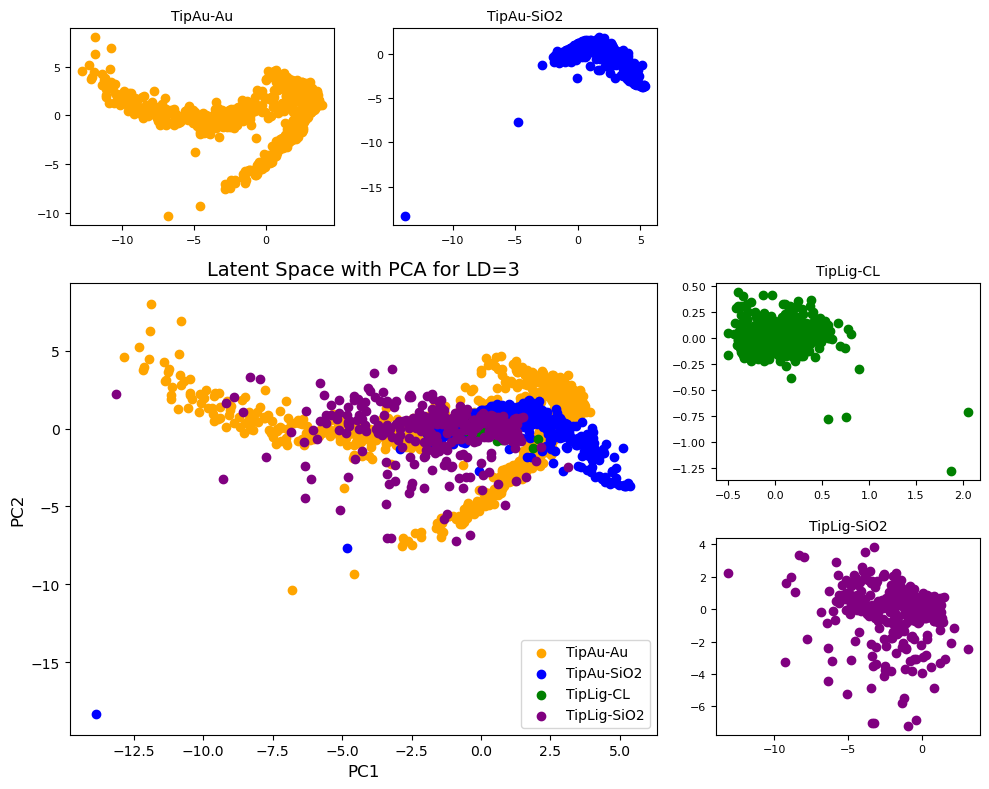

In [12]:
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 3)  
ax_main = plt.subplot(gs[1:3, 0:2])  

ax1 = plt.subplot(gs[0, 0])  
ax2 = plt.subplot(gs[0, 1])  
ax3 = plt.subplot(gs[1, 2])  
ax4 = plt.subplot(gs[2, 2])  

ax1.scatter(ld3_auau_pca[:, 0], ld3_auau_pca[:, 1], c='orange')
ax1.set_title('TipAu-Au', fontsize=10)
ax1.tick_params(labelsize=8)

ax2.scatter(ld3_ausio2_pca[:, 0], ld3_ausio2_pca[:, 1], c='blue')
ax2.set_title('TipAu-SiO2', fontsize=10)
ax2.tick_params(labelsize=8)

ax3.scatter(ld3_ligcl_pca[:, 0], ld3_ligcl_pca[:, 1], c='green')
ax3.set_title('TipLig-CL', fontsize=10)
ax3.tick_params(labelsize=8)

ax4.scatter(ld3_ligsio2_pca[:, 0], ld3_ligsio2_pca[:, 1], c='purple')
ax4.set_title('TipLig-SiO2', fontsize=10)
ax4.tick_params(labelsize=8)

ax_main.scatter(ld3_auau_pca[:, 0], ld3_auau_pca[:, 1], label='TipAu-Au', c='orange')
ax_main.scatter(ld3_ausio2_pca[:, 0], ld3_ausio2_pca[:, 1], label='TipAu-SiO2', c='blue')
ax_main.scatter(ld3_ligcl_pca[:, 0], ld3_ligcl_pca[:, 1], label='TipLig-CL', c='green')
ax_main.scatter(ld3_ligsio2_pca[:, 0], ld3_ligsio2_pca[:, 1], label='TipLig-SiO2', c='purple')
ax_main.set_xlabel('PC1', fontsize=12)
ax_main.set_ylabel('PC2', fontsize=12)
ax_main.set_title('Latent Space with PCA for LD=3', fontsize=14)
ax_main.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [13]:
ld5_auau = np.load('best_models/ld5_auau_all.npy')
ld5_ausio2 = np.load('best_models/ld5_ausio2_all.npy')
ld5_ligcl = np.load('best_models/ld5_ligcl_all.npy')
ld5_ligsio2 = np.load('best_models/ld5_ligsio2_all.npy')

pca = PCA(n_components=2)

ld5_auau_pca = pca.fit_transform(ld5_auau)
ld5_ausio2_pca = pca.fit_transform(ld5_ausio2)
ld5_ligcl_pca = pca.fit_transform(ld5_ligcl)
ld5_ligsio2_pca = pca.fit_transform(ld5_ligsio2)

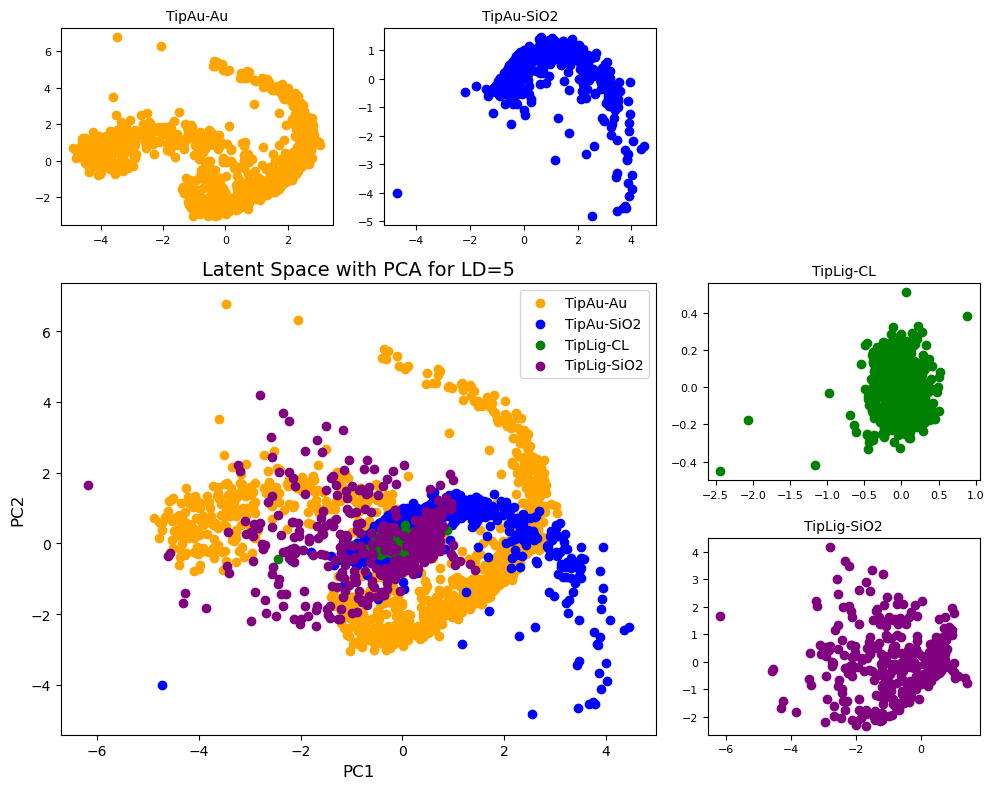

In [14]:
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 3)  
ax_main = plt.subplot(gs[1:3, 0:2])  

ax1 = plt.subplot(gs[0, 0])  
ax2 = plt.subplot(gs[0, 1])  
ax3 = plt.subplot(gs[1, 2])  
ax4 = plt.subplot(gs[2, 2])  

ax1.scatter(ld5_auau_pca[:, 0], ld5_auau_pca[:, 1], c='orange')
ax1.set_title('TipAu-Au', fontsize=10)
ax1.tick_params(labelsize=8)

ax2.scatter(ld5_ausio2_pca[:, 0], ld5_ausio2_pca[:, 1], c='blue')
ax2.set_title('TipAu-SiO2', fontsize=10)
ax2.tick_params(labelsize=8)

ax3.scatter(ld5_ligcl_pca[:, 0], ld5_ligcl_pca[:, 1], c='green')
ax3.set_title('TipLig-CL', fontsize=10)
ax3.tick_params(labelsize=8)

ax4.scatter(ld5_ligsio2_pca[:, 0], ld5_ligsio2_pca[:, 1], c='purple')
ax4.set_title('TipLig-SiO2', fontsize=10)
ax4.tick_params(labelsize=8)

ax_main.scatter(ld5_auau_pca[:, 0], ld5_auau_pca[:, 1], label='TipAu-Au', c='orange')
ax_main.scatter(ld5_ausio2_pca[:, 0], ld5_ausio2_pca[:, 1], label='TipAu-SiO2', c='blue')
ax_main.scatter(ld5_ligcl_pca[:, 0], ld5_ligcl_pca[:, 1], label='TipLig-CL', c='green')
ax_main.scatter(ld5_ligsio2_pca[:, 0], ld5_ligsio2_pca[:, 1], label='TipLig-SiO2', c='purple')
ax_main.set_xlabel('PC1', fontsize=12)
ax_main.set_ylabel('PC2', fontsize=12)
ax_main.set_title('Latent Space with PCA for LD=5', fontsize=14)
ax_main.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [15]:
ld10_auau = np.load('best_models/ld10_auau_all.npy')
ld10_ausio2 = np.load('best_models/ld10_ausio2_all.npy')
ld10_ligcl = np.load('best_models/ld10_ligcl_all.npy')
ld10_ligsio2 = np.load('best_models/ld10_ligsio2_all.npy')

pca = PCA(n_components=2)

ld10_auau_pca = pca.fit_transform(ld10_auau)
ld10_ausio2_pca = pca.fit_transform(ld10_ausio2)
ld10_ligcl_pca = pca.fit_transform(ld10_ligcl)
ld10_ligsio2_pca = pca.fit_transform(ld10_ligsio2)

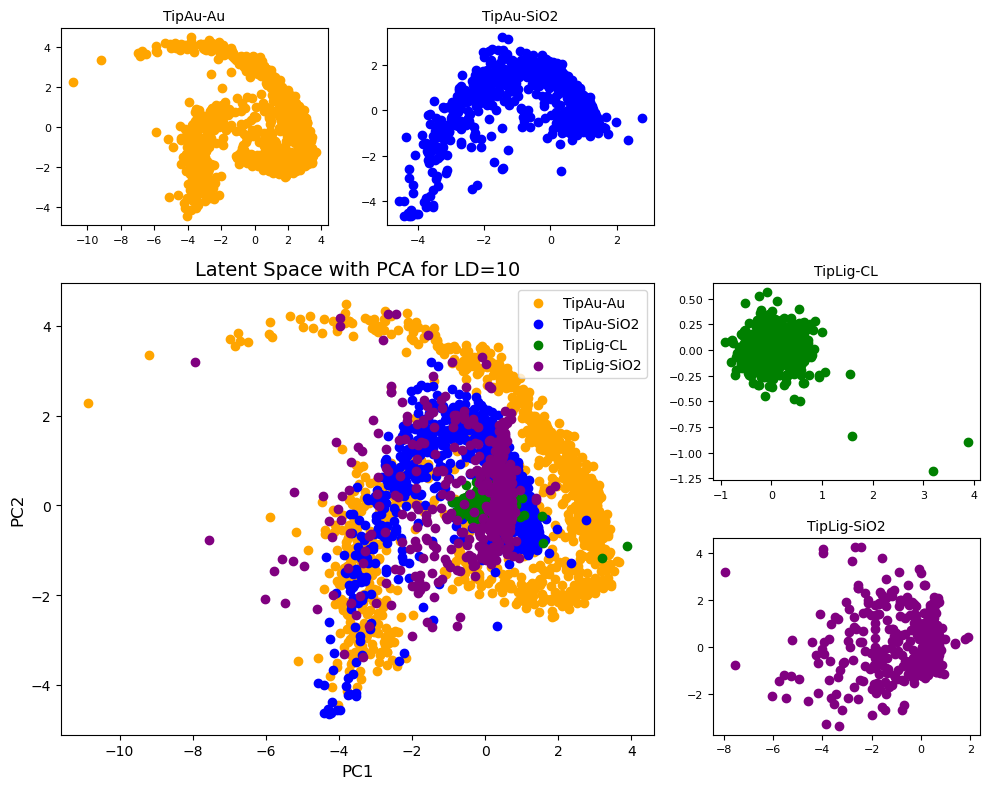

In [16]:
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 3)  
ax_main = plt.subplot(gs[1:3, 0:2])  

ax1 = plt.subplot(gs[0, 0])  
ax2 = plt.subplot(gs[0, 1])  
ax3 = plt.subplot(gs[1, 2])  
ax4 = plt.subplot(gs[2, 2])  

ax1.scatter(ld10_auau_pca[:, 0], ld10_auau_pca[:, 1], c='orange')
ax1.set_title('TipAu-Au', fontsize=10)
ax1.tick_params(labelsize=8)

ax2.scatter(ld10_ausio2_pca[:, 0], ld10_ausio2_pca[:, 1], c='blue')
ax2.set_title('TipAu-SiO2', fontsize=10)
ax2.tick_params(labelsize=8)

ax3.scatter(ld10_ligcl_pca[:, 0], ld10_ligcl_pca[:, 1], c='green')
ax3.set_title('TipLig-CL', fontsize=10)
ax3.tick_params(labelsize=8)

ax4.scatter(ld10_ligsio2_pca[:, 0], ld10_ligsio2_pca[:, 1], c='purple')
ax4.set_title('TipLig-SiO2', fontsize=10)
ax4.tick_params(labelsize=8)

ax_main.scatter(ld10_auau_pca[:, 0], ld10_auau_pca[:, 1], label='TipAu-Au', c='orange')
ax_main.scatter(ld10_ausio2_pca[:, 0], ld10_ausio2_pca[:, 1], label='TipAu-SiO2', c='blue')
ax_main.scatter(ld10_ligcl_pca[:, 0], ld10_ligcl_pca[:, 1], label='TipLig-CL', c='green')
ax_main.scatter(ld10_ligsio2_pca[:, 0], ld10_ligsio2_pca[:, 1], label='TipLig-SiO2', c='purple')
ax_main.set_xlabel('PC1', fontsize=12)
ax_main.set_ylabel('PC2', fontsize=12)
ax_main.set_title('Latent Space with PCA for LD=10', fontsize=14)
ax_main.legend(fontsize=10)

plt.tight_layout()
plt.show()